<a href="https://colab.research.google.com/github/bhuvanr2004/Image_Classifier_repo/blob/main/imageClassifier_cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

In [ ]:
# 3 (Updated test data generator to use flow_from_directory properly)

# First, move all test images into a subfolder so that Keras can load them
test_subdir = os.path.join(test_dir, 'unknown')
os.makedirs(test_subdir, exist_ok=True)

# Move images if they're not already in a subfolder
for fname in os.listdir(test_dir):
    src_path = os.path.join(test_dir, fname)
    dst_path = os.path.join(test_subdir, fname)
    if os.path.isfile(src_path):
        os.rename(src_path, dst_path)

# Now use flow_from_directory
test_data_gen = test_image_generator.flow_from_directory(
    directory=test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=50,        # Load all test images in one batch (assuming there are 50)
    class_mode=None,
    shuffle=False
)


Found 50 images belonging to 1 classes.


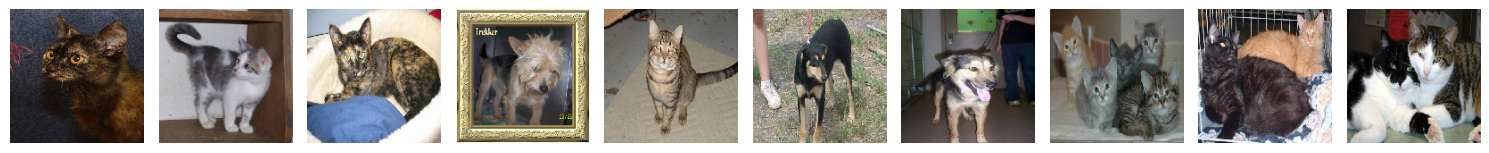

In [ ]:

# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(1, len(images_arr), figsize=(15, 5))
    if probabilities is False:
        for img, ax in zip(images_arr, axes):
            ax.imshow(img)
            ax.axis('off')
    else:
        for img, probability, ax in zip(images_arr, probabilities, axes):
            ax.imshow(img)
            ax.axis('off')
            if probability > 0.5:
                ax.set_title("%.2f" % (probability * 100) + "% dog")
            else:
                ax.set_title("%.2f" % ((1 - probability) * 100) + "% cat")
    plt.tight_layout()
    plt.show()

#  10 sample training images
sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:10])



In [ ]:
# 5
train_image_generator = ImageDataGenerator(
    rescale=1.0/255,               # Normalize pixel values
    rotation_range=40,            # Randomly rotate images by up to 40 degrees
    width_shift_range=0.2,        # Shift the image width-wise by up to 20%
    height_shift_range=0.2,       # Shift the image height-wise by up to 20%
    shear_range=0.2,              # Shear the image by up to 20%
    zoom_range=0.2,               # Random zoom by up to 20%
    horizontal_flip=True,         # Randomly flip images horizontally
    fill_mode='nearest'           # Fill in newly created pixels after transformations
)

Found 2000 images belonging to 2 classes.


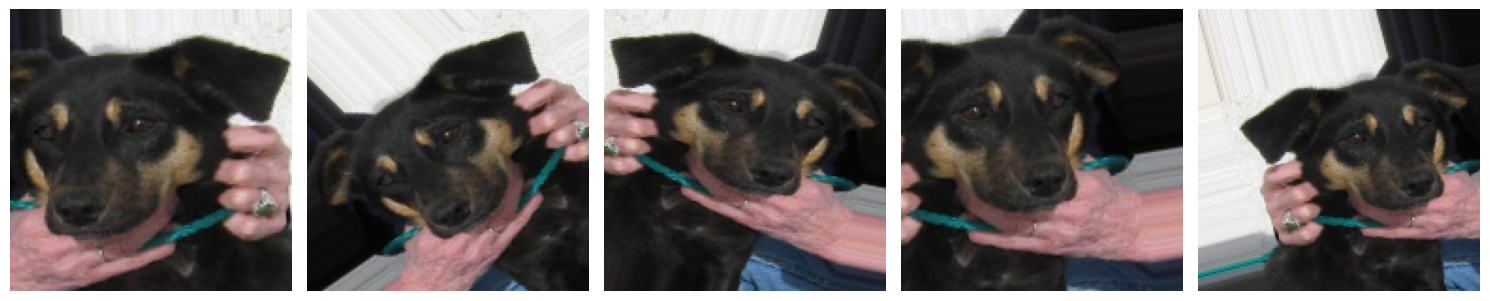

In [ ]:

# 6
train_data_gen = train_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

# Get 5 differently augmented versions of the same image
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

# Plot the augmented images
plotImages(augmented_images)


In [ ]:
# 7
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(512, activation='relu'),
    Dropout(0.5),

    Dense(1, activation='sigmoid')  # Output: probability of dog (vs cat)
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 8
history = model.fit(
    x=train_data_gen,
    steps_per_epoch=total_train // BATCH_SIZE,  # Use actual batch size
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // BATCH_SIZE   # Use actual batch size
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
16/40 ━━━━━━━━━━━━━━━━━━━━ 2:28 6s/step - accuracy: 0.5197 - loss: 0.8805

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


40/40 ━━━━━━━━━━━━━━━━━━━━ 117s 3s/step - accuracy: 0.5085 - loss: 0.8240 - val_accuracy: 0.5030 - val_loss: 0.6923
Epoch 2/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 113s 3s/step - accuracy: 0.5077 - loss: 0.6935 - val_accuracy: 0.4990 - val_loss: 0.6955
Epoch 3/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.5069 - loss: 0.6949 - val_accuracy: 0.5000 - val_loss: 0.6968
Epoch 4/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 111s 3s/step - accuracy: 0.5125 - loss: 0.6922 - val_accuracy: 0.5190 - val_loss: 0.6897
Epoch 5/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 113s 3s/step - accuracy: 0.5715 - loss: 0.6859 - val_accuracy: 0.5670 - val_loss: 0.6742
Epoch 6/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.5680 - loss: 0.6838 - val_accuracy: 0.5760 - val_loss: 0.6810
Epoch 7/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.5952 - loss: 0.6640 - val_accuracy: 0.6270 - val_loss: 0.6574
Epoch 8/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 119s 3s/step - accuracy: 0.6105 - loss: 0.6592 - val_accuracy: 0.6400 - val_loss: 0.

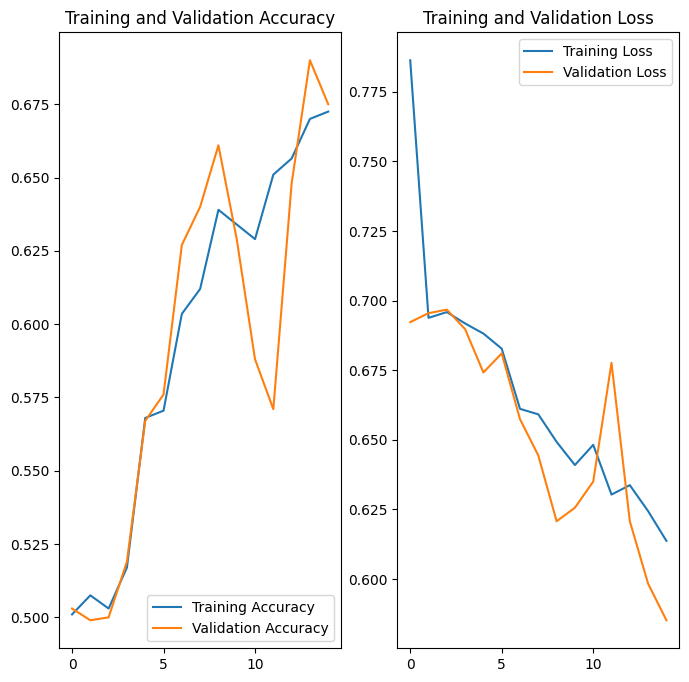

In [ ]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


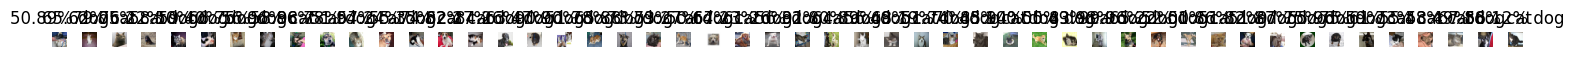

In [ ]:
# 10
# Predict probabilities for each test image
predictions = model.predict(test_data_gen)
probabilities = predictions.flatten().tolist()

# Get test images to plot
test_images = test_data_gen[0]  # test_data_gen[0] gives the batch of images

# Plot predictions
plotImages(test_images, probabilities)



In [ ]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")


Your model correctly identified 64.0% of the images of cats and dogs.
You passed the challenge!
